#Setup

In [1]:
!git init
!git remote add origin https://github.com/sgerloff/sustainable_deepfashion.git
!git pull origin main
!pip install -r requirements.txt

!make setup-preprocessed-gc CATEGORY_ID=1 MIN_PAIR_COUNT=20

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 326, done.
remote: Counting objects: 100% (326/326), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 326 (delta 165), reused 225 (delta 82), pack-reused 0
Receiving objects: 100% (326/326), 673.14 KiB | 19.80 MiB/s, done.
Resolving deltas: 100% (165/165), done.
From https://github.com/sgerloff/sustainable_deepfashion
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main
     |████████████████████████████████| 706kB 22.5MB/s 
  Created wheel for zipfile38: filename=zipfile38-0.0.3-cp37-none-any.whl size=22765 sha256=82b7b4798a2052679ccf6c2d2aa876ac2b02cc6c75aeba590eff3591a4165a4f
  Stored in directory: /root/.cache/pip/wheels/15/7a/ec/508d28bf3894e050aef4d0205cdf27a346e6e0891e979345d4
Successfully built zipfile38


Streaming output truncated to the last 5000 lines.
  inflating: data/processed/train/cat1/107930_8543.jpg  
  inflating: data/processed/train/cat1/024331_1934.jpg  
  inflating: data/processed/train/cat1/141052_11086.jpg  
  inflating: data/processed/train/cat1/182857_14346.jpg  
  inflating: data/processed/train/cat1/010400_837.jpg  
  inflating: data/processed/train/cat1/094388_7451.jpg  
  inflating: data/processed/train/cat1/061448_4860.jpg  
  inflating: data/processed/train/cat1/004991_398.jpg  
  inflating: data/processed/train/cat1/159042_12457.jpg  
  inflating: data/processed/train/cat1/154596_12114.jpg  
  inflating: data/processed/train/cat1/168740_13223.jpg  
  inflating: data/processed/train/cat1/074348_5870.jpg  
  inflating: data/processed/train/cat1/097553_7718.jpg  
  inflating: data/processed/train/cat1/069704_5520.jpg  
  inflating: data/processed/train/cat1/171464_13426.jpg  
  inflating: data/processed/train/cat1/180180_14119.jpg  
  inflating: data/processed/trai

#Learning Rate Estimation

In [2]:
!wget http://d2fcl18pl6lkip.cloudfront.net/models/effnet_freeze_basemodel.h5 -O models/effnet_freeze_basemodel.h5 

--2021-03-06 08:51:47--  http://d2fcl18pl6lkip.cloudfront.net/models/effnet_freeze_basemodel.h5
Resolving d2fcl18pl6lkip.cloudfront.net (d2fcl18pl6lkip.cloudfront.net)... 99.84.216.55, 99.84.216.109, 99.84.216.32, ...
Connecting to d2fcl18pl6lkip.cloudfront.net (d2fcl18pl6lkip.cloudfront.net)|99.84.216.55|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://d2fcl18pl6lkip.cloudfront.net/models/effnet_freeze_basemodel.h5 [following]
--2021-03-06 08:51:47--  https://d2fcl18pl6lkip.cloudfront.net/models/effnet_freeze_basemodel.h5
Connecting to d2fcl18pl6lkip.cloudfront.net (d2fcl18pl6lkip.cloudfront.net)|99.84.216.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20522000 (20M) [binary/octet-stream]
Saving to: ‘models/effnet_freeze_basemodel.h5’

models/effnet_freez 100%[===================>]  19.57M  15.5MB/s    in 1.3s    

2021-03-06 08:51:49 (15.5 MB/s) - ‘models/effnet_freeze_basemodel.h5’ saved [20522000/2052200

Load model from /content/models/effnet_freeze_basemodel.h5
Epoch 1/3
912/912 [==============================] - 259s 241ms/step - loss: 0.9451 - score: 0.0000e+00
Epoch 2/3
912/912 [==============================] - 219s 240ms/step - loss: 0.9401 - score: 0.0000e+00
Epoch 3/3
912/912 [==============================] - 217s 238ms/step - loss: 0.8150 - score: 0.0000e+00


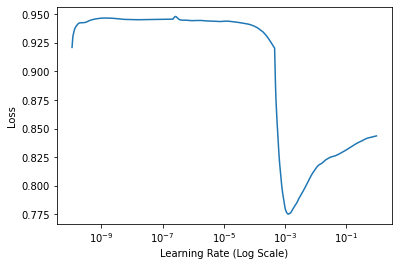

In [5]:
from src.models.learning_rate_estimator import LearningRateEstimator
from src.models.efficient_net_triplet import EfficientNetTriplet
from src.utility import get_project_dir
import joblib, os

effnet_triplet = EfficientNetTriplet()
effnet_triplet.load("effnet_freeze_basemodel.h5")
effnet_triplet.set_basemodel_freeze_ratio(0.5)

train_df = joblib.load(os.path.join(get_project_dir(),
                                    "data",
                                    "processed",
                                    "category_id_1_deepfashion_train.joblib"))

lrf = LearningRateEstimator(effnet_triplet.model)

dataset, train_size = effnet_triplet.get_dataset(train_df, batch_size=32, training_ratio=1.)

lrf.find( dataset, 1e-10, 1e0, steps_per_epoch=train_size )
lrf.plot_loss()